In [1]:
# Загрузка данных в Google Colab
from google.colab import files
import pandas as pd

# Загрузка файла ch.csv
uploaded = files.upload()

# Преобразование данных в DataFrame
df = pd.read_csv('ch.csv')

# Вывод первых 5 строк данных для первичного анализа
df.head()


Saving ch.csv to ch.csv


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Получим общую информацию о данных, включая типы столбцов и наличие пропущенных значений:

In [2]:
# Информация о типах данных и наличие пропусков
df.info()

# Проверка на наличие пропущенных значений в каждом столбце
missing_values = df.isnull().sum()

print("Количество пропущенных значений в каждом столбце:")
print(missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
Количество пропущенных значений в каждом столбце:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


Далее рассмотрим основные статистические показатели для числовых признаков:

In [3]:
# Основные статистические показатели по числовым признакам
df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


#Краткие выводы по первичному анализу данных:

**Отсутствие пропусков:**

Данные содержат 20,640 записей и 9 признаков, все столбцы полностью заполнены, пропущенных значений нет. Это упрощает задачу предобработки, так как не требуется заполнять или удалять пропуски.

**Типы данных:**

Все признаки имеют тип float64, что является подходящим типом данных для задачи регрессии.

Нормализуем признак MedInc (медианный доход), так как у него достаточно широкий диапазон значений. Это может улучшить работу моделей, особенно линейных.

In [4]:
from sklearn.preprocessing import StandardScaler

# Создаем копию данных для работы с нормализацией
df_normalized = df.copy()

# Инициализация StandardScaler
scaler = StandardScaler()

# Нормализация признака MedInc
df_normalized['MedInc'] = scaler.fit_transform(df_normalized[['MedInc']])

# Выводим первые пять строк таблицы для проверки
print(df_normalized.head())

# Проверка статистических показателей после нормализации
print(df_normalized.describe())


     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  2.332238      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  1.782699      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  0.932968      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4 -0.012881      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  2.064000e+04  20640.000000  20640.000000  20640.000000  20640.000000   
mean   6.609700e-17     28.639486      5.429000      1.096675   1425.476744   
std    1.000024e+00     12.585558      2.474173      0.473911   1132.462122   
min   -1.774299e+00      1.000000      0.846154

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Разделение на обучающее и тестовое подмножества (80% на обучение, 20% на тестирование)
X = df.drop('MedHouseVal', axis=1)  # Признаки
y = df['MedHouseVal']               # Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация и обучение модели линейной регрессии
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

print("Модель LinearRegression успешно обучена.")



Модель LinearRegression успешно обучена.


In [7]:
# Предсказание на тестовом множестве
y_test_pred = linear_regressor.predict(X_test)

# Оценка точности модели с помощью встроенной функции score (R²)
test_score = linear_regressor.score(X_test, y_test)

print(f"Точность модели на тестовом множестве (R²): {test_score:.3f}")


Точность модели на тестовом множестве (R²): 0.576


In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Инициализация и обучение модели дерева решений
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

# Предсказание на тестовом множестве
y_test_pred_tree = tree_regressor.predict(X_test)

# Оценка точности модели дерева решений
tree_score = tree_regressor.score(X_test, y_test)

print(f"Точность модели дерева решений на тестовом множестве (R²): {tree_score:.3f}")



Точность модели дерева решений на тестовом множестве (R²): 0.622


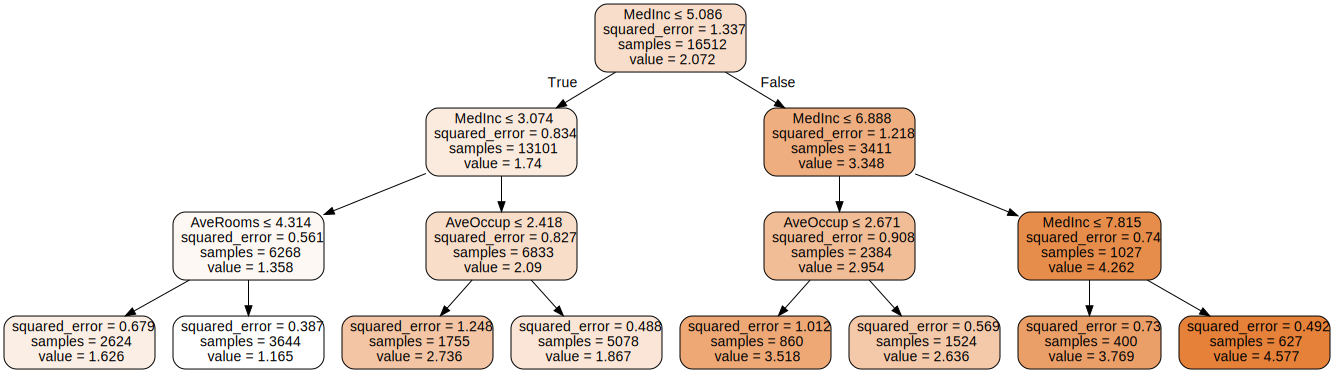

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import graphviz

# Инициализация и обучение модели дерева решений с ограниченной глубиной
tree_regressor_limited = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_regressor_limited.fit(X_train, y_train)

# Экспорт ограниченного дерева решений в формат DOT
dot_data = export_graphviz(
    tree_regressor_limited,
    out_file=None,
    feature_names=X.columns,  # Имена признаков
    filled=True,
    rounded=True,
    special_characters=True,
    impurity=True,
)

# Отображение графа в Jupyter Notebook
graph = graphviz.Source(dot_data, format="png")
graph  # Отобразить граф прямо в ячейке





Оптимизируем параметры модели: максимальная глубина (max_depth) и минимальное количество образцов для разделения узла (min_samples_split)

Используем перекрестную проверку с использованием GridSearchCV.

Это поможет найти наилучшие значения параметров для улучшения качества модели.

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Определение модели дерева решений
tree_regressor = DecisionTreeRegressor(random_state=42)

# Определение параметров для оптимизации
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, 20],  # Пробуем разные значения глубины дерева
    'min_samples_split': [2, 5, 10, 20]  # Минимальное количество образцов для разделения узла
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(
    estimator=tree_regressor,
    param_grid=param_grid,
    scoring='r2',  # Используем R² для оценки модели
    cv=5,  # Количество фолдов для перекрестной проверки
    n_jobs=-1  # Используем все доступные процессоры
)

# Поиск наилучших параметров с перекрестной проверкой
grid_search.fit(X_train, y_train)

# Вывод лучших параметров
print(f"Лучшие параметры: {grid_search.best_params_}")

# Обучение модели с лучшими параметрами
best_tree_regressor = grid_search.best_estimator_

# Предсказание на тестовом множестве
y_test_pred_best_tree = best_tree_regressor.predict(X_test)

# Оценка точности модели на тестовом наборе данных
best_tree_score = best_tree_regressor.score(X_test, y_test)

print(f"Точность оптимизированной модели дерева решений на тестовом множестве (R²): {best_tree_score:.3f}")


Лучшие параметры: {'max_depth': 10, 'min_samples_split': 20}
Точность оптимизированной модели дерева решений на тестовом множестве (R²): 0.692


# Выводы по проделанной работе:

##Сравнение точности двух моделей:

**Линейная регрессия:**

Точность на тестовом множестве (R²): 0.576

Линейная регрессия показала умеренные результаты. Она хорошо справляется с задачами, где есть линейная зависимость между признаками и целевой переменной, но не подходит для сложных и нелинейных паттернов в данных.

**Дерево решений (неоптимизированное):**

Точность на тестовом множестве (R²): 0.622

Дерево решений уже в базовом варианте превзошло линейную регрессию благодаря своей способности моделировать нелинейные зависимости. Однако оно все еще подвержено переобучению без корректной настройки параметров.

**Дерево решений (оптимизированное):**

Точность на тестовом множестве (R²): 0.692

Оптимизация параметров дерева (глубина и минимальное количество образцов для разбиения) значительно улучшила качество модели, сделав её наиболее точной среди рассмотренных вариантов. Оптимизированное дерево решений продемонстрировало лучшие результаты в объяснении вариации целевой переменной на тестовых данных.

## Мнение о предпочтительности использования моделей:

**Линейная регрессия:**

Преимущества:

Простота в использовании и интерпретации.

Высокая скорость работы и низкие вычислительные затраты.

Подходит для задач с линейными зависимостями.

Недостатки:

Плохо справляется с нелинейными зависимостями и взаимодействиями между признаками.

Ограниченная гибкость, что может снижать точность на сложных данных.

**Дерево решений:**

Преимущества:

Способно моделировать сложные и нелинейные зависимости между признаками.

Хорошо интерпретируется через визуализацию, показывает важность признаков.

Гибкость в настройке через различные гиперпараметры, такие как глубина, минимальное количество образцов для разбиения и т.д.

Недостатки:

Склонно к переобучению без правильной настройки.

Может требовать больше вычислительных ресурсов, особенно при большой глубине и сложных данных.

В случае большого количества признаков и данных визуализация может становиться сложной.

##Рекомендации по использованию:

Линейная регрессия лучше использовать для простых задач с линейными связями и небольшим количеством признаков.

Дерево решений предпочтительно для задач с более сложными и нелинейными зависимостями, где важна интерпретируемость модели и возможность работать с разнородными данными.

Оптимизация параметров позволяет дереву решений значительно улучшить точность предсказаний и снизить переобучение, делая его предпочтительным выбором для многих реальных задач в анализе данных.